In [46]:
from scipy.spatial.distance import cdist
import numpy as np

class KMeans:
    def __init__(self, k, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations
        
    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]
        for i in range(self.max_iterations):
            # Step 1: Assign clusters to points
            distances = cdist(X, self.centroids)
            cluster_labels = np.argmin(distances, axis=1)
            
            # Step 2: Update centroids
            for j in range(self.k):
                mask = cluster_labels == j
                if np.sum(mask) > 0:
                    self.centroids[j,:] = np.mean(X[mask, :], axis=0)
    
    def predict(self, X):
        distances = cdist(X, self.centroids)
        cluster_labels = np.argmin(distances, axis=1)
        return cluster_labels

In [47]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=df.apply(le.fit_transform)

In [50]:
X=df.values

In [51]:
kmeans = KMeans(k=3)
kmeans.fit(X)

In [52]:
labels = kmeans.predict(X)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

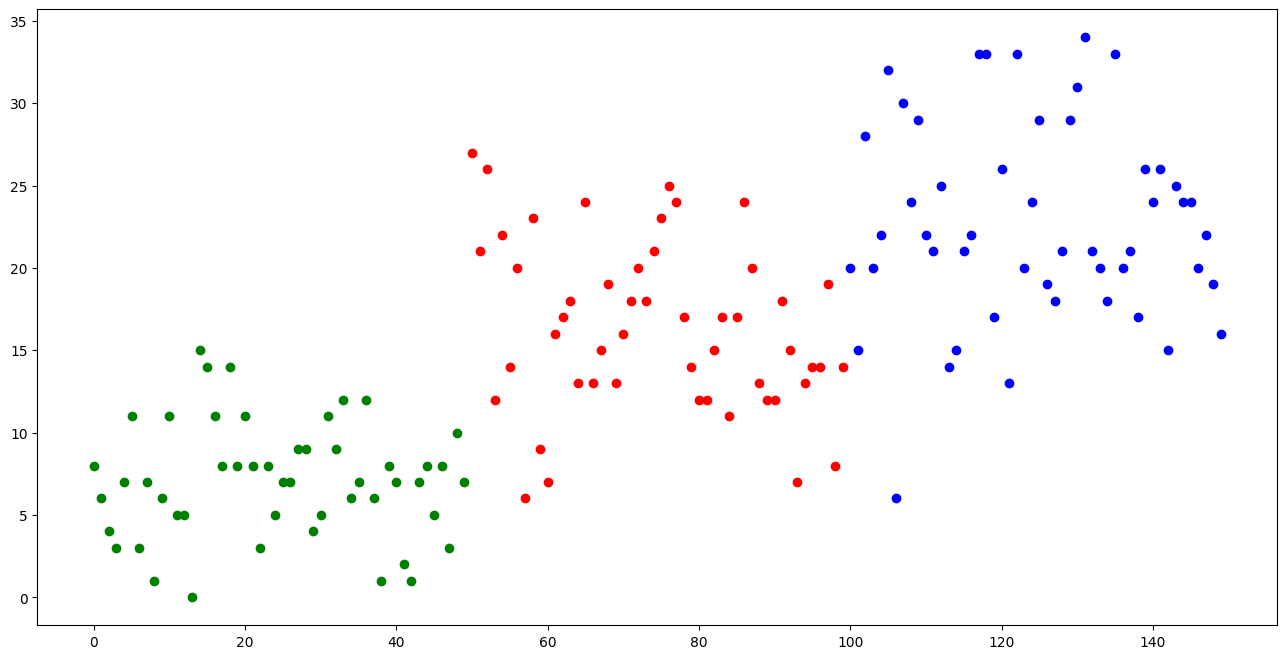

In [53]:
plt.figure(figsize=(16,8))
plt.scatter(X[labels==0,0],X[labels==0,1],c='red')
plt.scatter(X[labels==1,0],X[labels==1,1],c='Blue')
plt.scatter(X[labels==2,0],X[labels==2,1],c='green')
plt.show()

In [54]:
from sklearn.cluster import KMeans
def elbow_method(X):
    wcss = []
    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    plt.plot(range(2, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.show()

/opt/homebrew/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/3.6.3/libexec/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

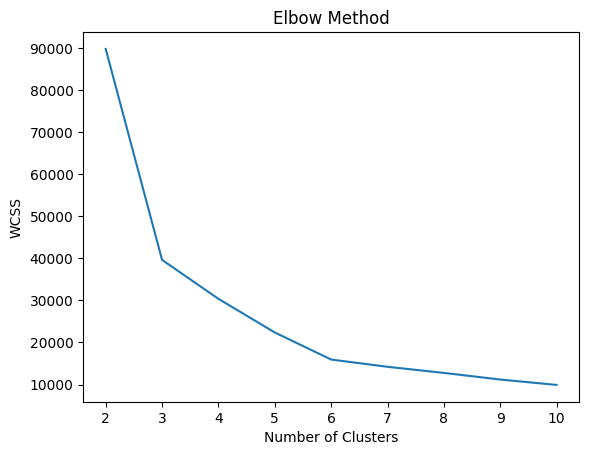

In [55]:
elbow_method(df)